In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('C:/Users/11/Desktop/handwritten_data.csv', encoding='utf8',nrows=100000)

# Extract features and labels
features = df.iloc[:, 1:].values.reshape(-1, 28, 28, 1)  # Assuming pixel values are in columns 1 to the end
labels = df.iloc[:, 0].values

# Check the number of unique labels/classes
num_classes = len(np.unique(labels))
print("Number of classes:", num_classes)

# Normalize pixel values
features = features.astype(np.float32) / 255.0

# One-hot encode labels
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels_one_hot, test_size=0.2, random_state=42)

# Build the model
cnn = Sequential()
cnn.add(Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(120, (5, 5), padding='same', activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=12, validation_data=(x_test, y_test), verbose=2)

# Evaluate the model on the test set
res = cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1] * 100)


Number of classes: 12
Epoch 1/12
625/625 - 26s - loss: 0.2061 - accuracy: 0.9375 - val_loss: 0.0701 - val_accuracy: 0.9795 - 26s/epoch - 42ms/step
Epoch 2/12
625/625 - 24s - loss: 0.0532 - accuracy: 0.9845 - val_loss: 0.0454 - val_accuracy: 0.9872 - 24s/epoch - 38ms/step
Epoch 3/12
625/625 - 25s - loss: 0.0375 - accuracy: 0.9887 - val_loss: 0.0447 - val_accuracy: 0.9874 - 25s/epoch - 40ms/step
Epoch 4/12
625/625 - 23s - loss: 0.0273 - accuracy: 0.9917 - val_loss: 0.0362 - val_accuracy: 0.9894 - 23s/epoch - 37ms/step
Epoch 5/12
625/625 - 25s - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0341 - val_accuracy: 0.9909 - 25s/epoch - 41ms/step
Epoch 6/12
625/625 - 26s - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.0309 - val_accuracy: 0.9926 - 26s/epoch - 42ms/step
Epoch 7/12
625/625 - 24s - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.0336 - val_accuracy: 0.9917 - 24s/epoch - 38ms/step
Epoch 8/12
625/625 - 24s - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.0249 - val_accuracy: 0.9936 - 

1/1 [==============================] - 0s 62ms/step


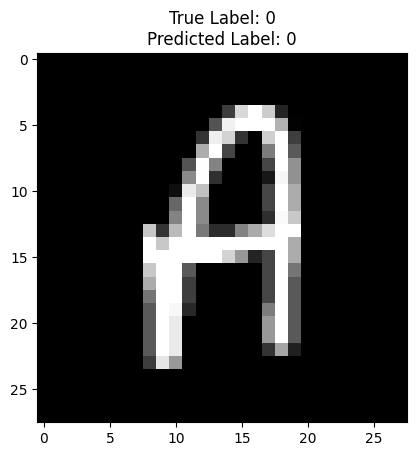

In [8]:
from random import randint
import matplotlib.pyplot as plt

# Choose a random sample from the test set
index = randint(0, len(x_test) - 1)
sample_image = x_test[index].reshape(28, 28)

# Display the sample image
plt.imshow(sample_image, cmap='gray')
plt.title(f"True Label: {np.argmax(y_test[index])}\nPredicted Label: {np.argmax(cnn.predict(x_test[index].reshape(1, 28, 28, 1)))}")
plt.show()